# RashomonSetAnalyser class ver. 1.0

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dalex as dx
import copy

In [2]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
X, y = datasets.load_breast_cancer(return_X_y=True, as_frame=True)

params = {'n_estimators': list(np.arange(10, 50, 10, dtype = 'int'))}
rf = RandomForestClassifier()

In [3]:
from RashomonSetAnalyser import RashomonSetAnalyser

### How does this class work?

In [4]:
rashomon = RashomonSetAnalyser()

In [5]:
rashomon.base_model is None

True

In [6]:
rashomon.generate_rashomon_set(X, y, rf, searcher_type = 'grid', rashomon_ratio = 1, param_grid = params)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.068501,0.001598,0.005905,0.000320,40,{'n_estimators': 40},0.912281,0.947368,0.991228,0.964912,0.982301,0.959618,0.028045,1
1,0.050082,0.001091,0.004952,0.000192,30,{'n_estimators': 30},0.921053,0.938596,0.982456,0.982456,0.973451,0.959603,0.025154,2
2,0.033726,0.001064,0.003671,0.000111,20,{'n_estimators': 20},0.912281,0.938596,0.982456,0.964912,0.973451,0.954339,0.025630,3
3,0.019087,0.002381,0.002872,0.000089,10,{'n_estimators': 10},0.903509,0.947368,0.982456,0.991228,0.946903,0.954293,0.031109,4


In [7]:
rashomon.base_model

['Base model', RandomForestClassifier(n_estimators=40)]

In [8]:
rashomon.models

[['Model 1', RandomForestClassifier(n_estimators=30)],
 ['Model 2', RandomForestClassifier(n_estimators=20)],
 ['Model 3', RandomForestClassifier(n_estimators=10)]]

In [9]:
rashomon.change_rashomon_ratio(0.6)

In [10]:
rashomon.models

[['Model 1', RandomForestClassifier(n_estimators=30)],
 ['Model 2', RandomForestClassifier(n_estimators=20)]]

### Fit models

In [11]:
rashomon.fit(X, y)

### Compare PDP

In [12]:
rashomon.pdp_comparator(X, y)

,colname,Model 1,Model 2
0,mean radius,1.465500,3.163333
1,mean texture,0.412500,0.652000
2,mean perimeter,1.326639,2.114417
3,mean area,2.551417,1.119250
4,mean smoothness,0.588667,0.981333
5,mean compactness,1.279139,1.385417
6,mean concavity,1.937750,1.114417
7,mean concave points,1.485111,0.510833
8,mean symmetry,0.660806,0.436417
9,mean fractal dimension,0.507806,0.239917


In [13]:
rashomon.pdp_comparator(X, y, metric = 'integrate')

,colname,Model 1,Model 2
0,mean radius,25.930223,62.170590
1,mean texture,7.563641,-12.313836
2,mean perimeter,-115.122605,-295.760556
3,mean area,3780.249314,1484.843700
4,mean smoothness,-0.001684,0.001576
5,mean compactness,-0.303309,-0.345714
6,mean concavity,0.433926,0.250233
7,mean concave points,0.050702,-0.028043
8,mean symmetry,0.085134,-0.021083
9,mean fractal dimension,-0.030301,0.000408


### Comapre PDP with parameter *save_model_profiles=True* and change metrics

In [14]:
rashomon.pdp_comparator(X, y, save_model_profiles = True)

,colname,Model 1,Model 2
0,mean radius,1.465500,3.163333
1,mean texture,0.412500,0.652000
2,mean perimeter,1.326639,2.114417
3,mean area,2.551417,1.119250
4,mean smoothness,0.588667,0.981333
5,mean compactness,1.279139,1.385417
6,mean concavity,1.937750,1.114417
7,mean concave points,1.485111,0.510833
8,mean symmetry,0.660806,0.436417
9,mean fractal dimension,0.507806,0.239917


In [15]:
rashomon.pdp_comparator_change_metric(metric = 'integrate')

,colname,Model 1,Model 2
0,mean radius,25.930223,62.170590
1,mean texture,7.563641,-12.313836
2,mean perimeter,-115.122605,-295.760556
3,mean area,3780.249314,1484.843700
4,mean smoothness,-0.001684,0.001576
5,mean compactness,-0.303309,-0.345714
6,mean concavity,0.433926,0.250233
7,mean concave points,0.050702,-0.028043
8,mean symmetry,0.085134,-0.021083
9,mean fractal dimension,-0.030301,0.000408


In [16]:
rashomon.pdp_comparator_change_metric(metric = 'sum')

,colname,Model 1,Model 2
0,mean radius,1.156889,2.772167
1,mean texture,0.279444,-0.326833
2,mean perimeter,-0.573028,-2.031417
3,mean area,2.551417,1.119250
4,mean smoothness,0.185000,0.350500
5,mean compactness,-1.134139,-1.367583
6,mean concavity,1.816528,1.002083
7,mean concave points,-0.372167,-0.071167
8,mean symmetry,0.338972,-0.027083
9,mean fractal dimension,-0.364694,0.014417


### Metrics: skewness and kurtosis of PDP profile

If you want to calculate these metrics on base model, set calculate_metric_for_base_model = True. Skewness and kurtosis are general statistics and results beneath for non-base models doesn't take into account base model results.

In [17]:
rashomon.pdp_comparator(X, y, metric = 'skewness', calculate_metric_for_base_model = True, save_model_profiles = True)

,colname,Model 1,Model 2,Base model
0,mean radius,0.491161,0.466393,1.205869
1,mean texture,0.783590,1.298797,0.968312
2,mean perimeter,0.513140,1.331887,0.670638
3,mean area,1.341082,1.232787,1.230990
4,mean smoothness,0.621497,0.481022,0.930338
5,mean compactness,2.157258,2.075885,0.231138
6,mean concavity,1.151466,1.457426,1.398720
7,mean concave points,1.355069,1.177534,1.187083
8,mean symmetry,-0.570437,0.447658,1.931734
9,mean fractal dimension,0.216801,-2.456217,-1.431265


In [18]:
rashomon.pdp_comparator_change_metric(metric = 'kurtosis', calculate_metric_for_base_model = True)

,colname,Model 1,Model 2,Base model
0,mean radius,-1.744721,-1.746362,-0.272102
1,mean texture,-0.894683,0.268891,-0.612773
2,mean perimeter,-1.709342,-0.009290,-1.301896
3,mean area,-0.064776,-0.478783,-0.474728
4,mean smoothness,-1.396836,-1.672988,-0.774776
5,mean compactness,3.311969,3.377753,-1.628139
6,mean concavity,-0.483567,0.316392,0.199645
7,mean concave points,0.052236,-0.538940,-0.445360
8,mean symmetry,-0.459082,-1.482475,2.127572
9,mean fractal dimension,-1.887807,4.585209,0.766843


### Choose a subset of variables

In [19]:
rashomon.pdp_comparator(X, y, save_model_profiles = True, variables = ['mean area', 'worst area'])

,colname,Model 1,Model 2
0,mean area,2.551417,1.11925
1,worst area,1.676083,4.44825


In [20]:
rashomon.pdp_comparator_change_metric(metric = 'integrate')

,colname,Model 1,Model 2
0,mean area,3780.249314,1484.843700
1,worst area,-2459.834853,-10032.088747


In [21]:
rashomon.pdp_comparator_change_metric(metric = 'sum')

,colname,Model 1,Model 2
0,mean area,2.551417,1.11925
1,worst area,-0.573972,-3.51775


### Visualisations

In [22]:
rashomon.pdp_comparator(X, y)

,colname,Model 1,Model 2
0,mean radius,1.465500,3.163333
1,mean texture,0.412500,0.652000
2,mean perimeter,1.326639,2.114417
3,mean area,2.551417,1.119250
4,mean smoothness,0.588667,0.981333
5,mean compactness,1.279139,1.385417
6,mean concavity,1.937750,1.114417
7,mean concave points,1.485111,0.510833
8,mean symmetry,0.660806,0.436417
9,mean fractal dimension,0.507806,0.239917


### General results for each model

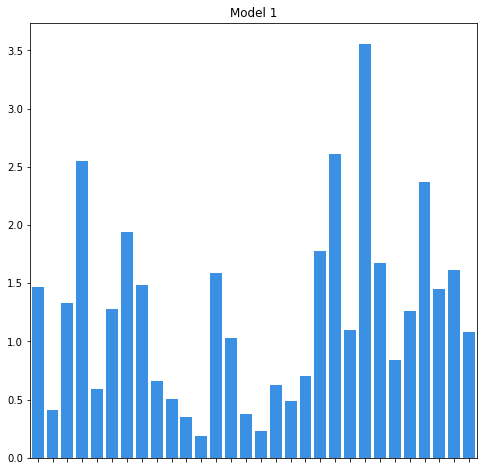

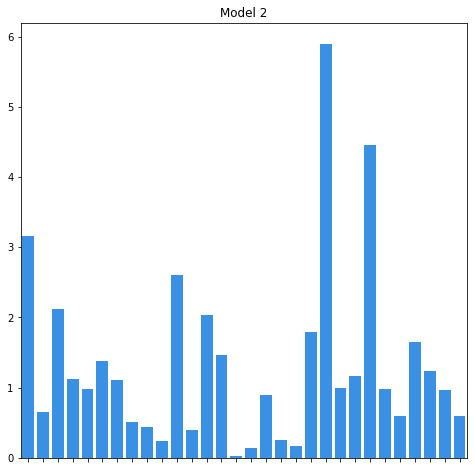

In [23]:
rashomon.show_results(xlabels = False)

You can choose subset of models:

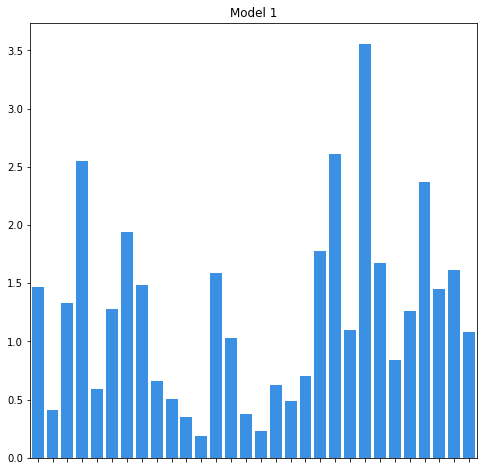

In [24]:
rashomon.show_results(model_names = ['Model 1'], xlabels = False)

Ans subset of features:

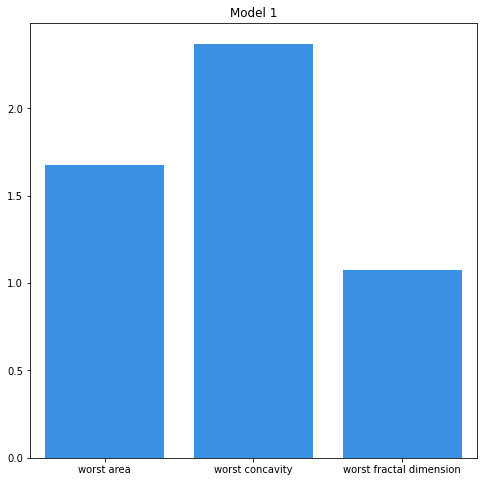

In [25]:
rashomon.show_results(model_names = ['Model 1'], features = ['worst fractal dimension', 'worst concavity', 'worst area'], xlabels = True)

### Barplots of sum of measures for each model

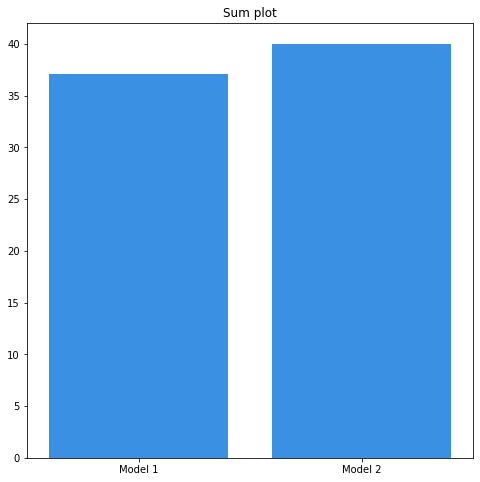

In [26]:
rashomon.sum_plot()

As before, you can choose subset of models:

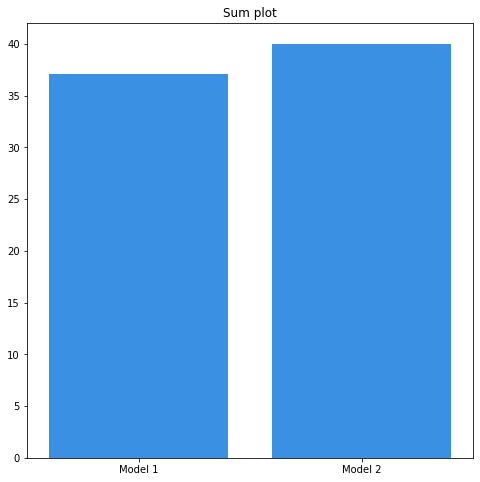

In [27]:
rashomon.sum_plot(model_names=['Model 1', 'Model 2'])

And subset of features:

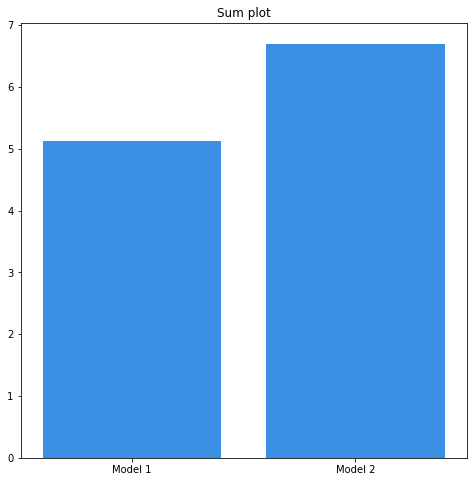

In [28]:
rashomon.sum_plot(model_names=['Model 1', 'Model 2'], features = ['worst fractal dimension', 'worst concavity', 'worst area'])

### Boxplots for each feature

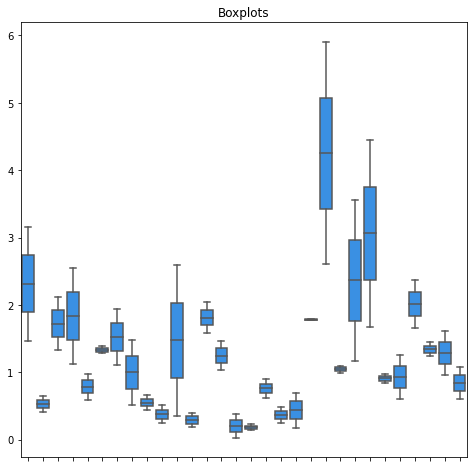

In [29]:
rashomon.boxplots()

As before, you can choose subset of models:

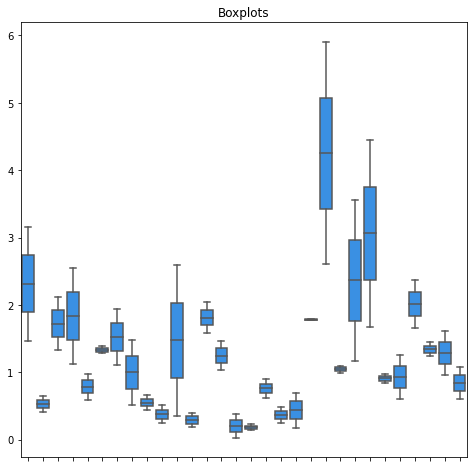

In [30]:
rashomon.boxplots(model_names=['Model 1', 'Model 2'])

And subset of features:

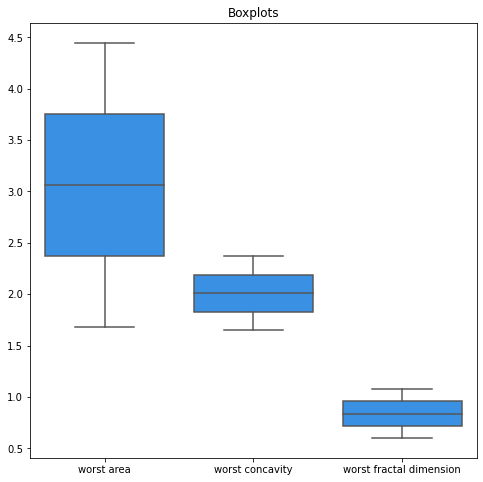

In [31]:
rashomon.boxplots(model_names=['Model 1', 'Model 2'], features=['worst fractal dimension', 'worst concavity', 'worst area'], xlabels = True)

### Histograms of calculations

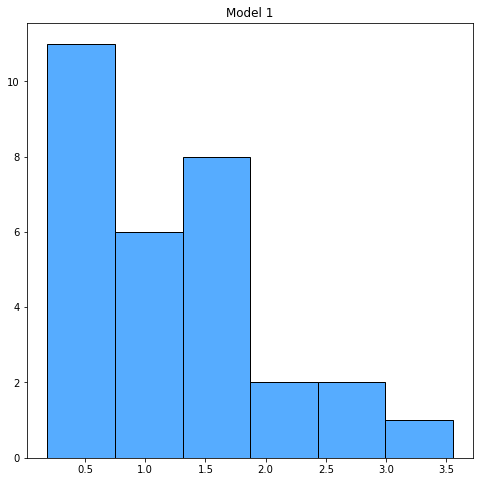

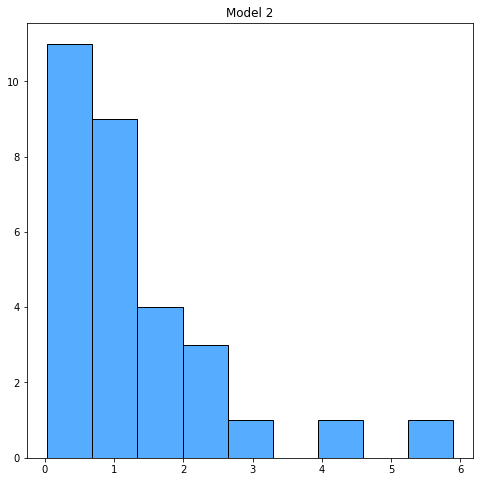

In [32]:
rashomon.histograms()